In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [3]:
# 결측치 확인 :  결측치 없음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [4]:
# 데이터 기술 통계량
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


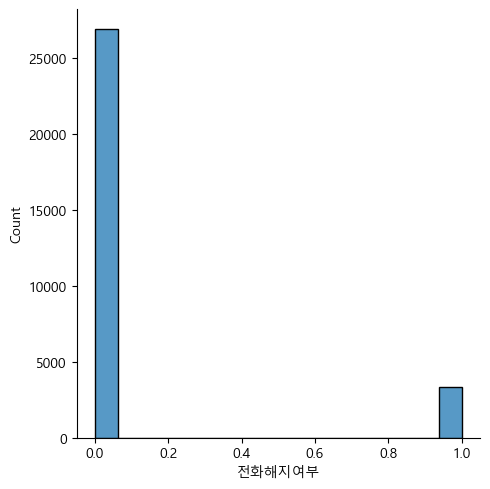

In [5]:
## 시각화
# 종속 변수 분포 확인
# 해지 1, 유지 0
plt.rc('font', family='Malgun Gothic')
sns.displot(x = train['전화해지여부'])
plt.show()

In [6]:
# 해지 수 count
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

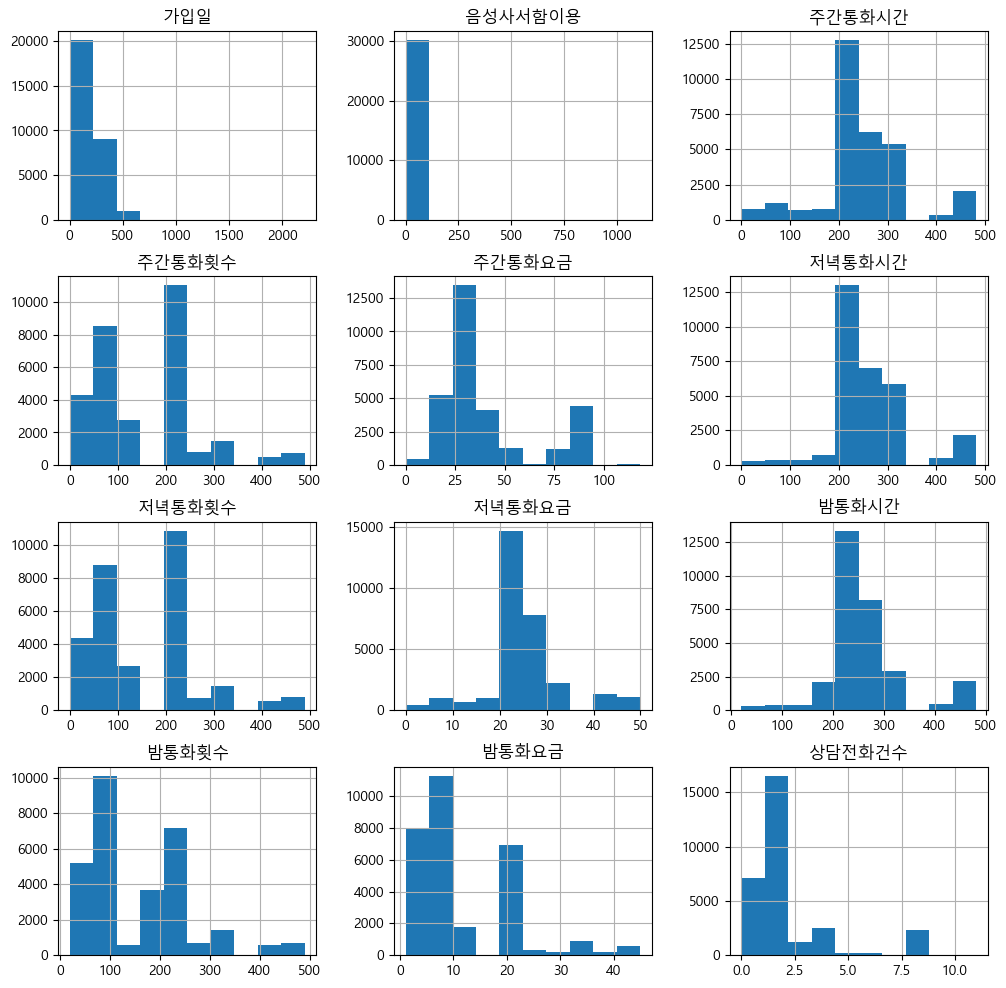

In [7]:
# 전체 데이터 분포 확인
plt.rc('font', family='Malgun Gothic')
except_cancel = train.drop('전화해지여부', axis=1)
except_cancel.hist(figsize=(12,12))
plt.show()


<Axes: xlabel='전화해지여부', ylabel='밤통화요금'>

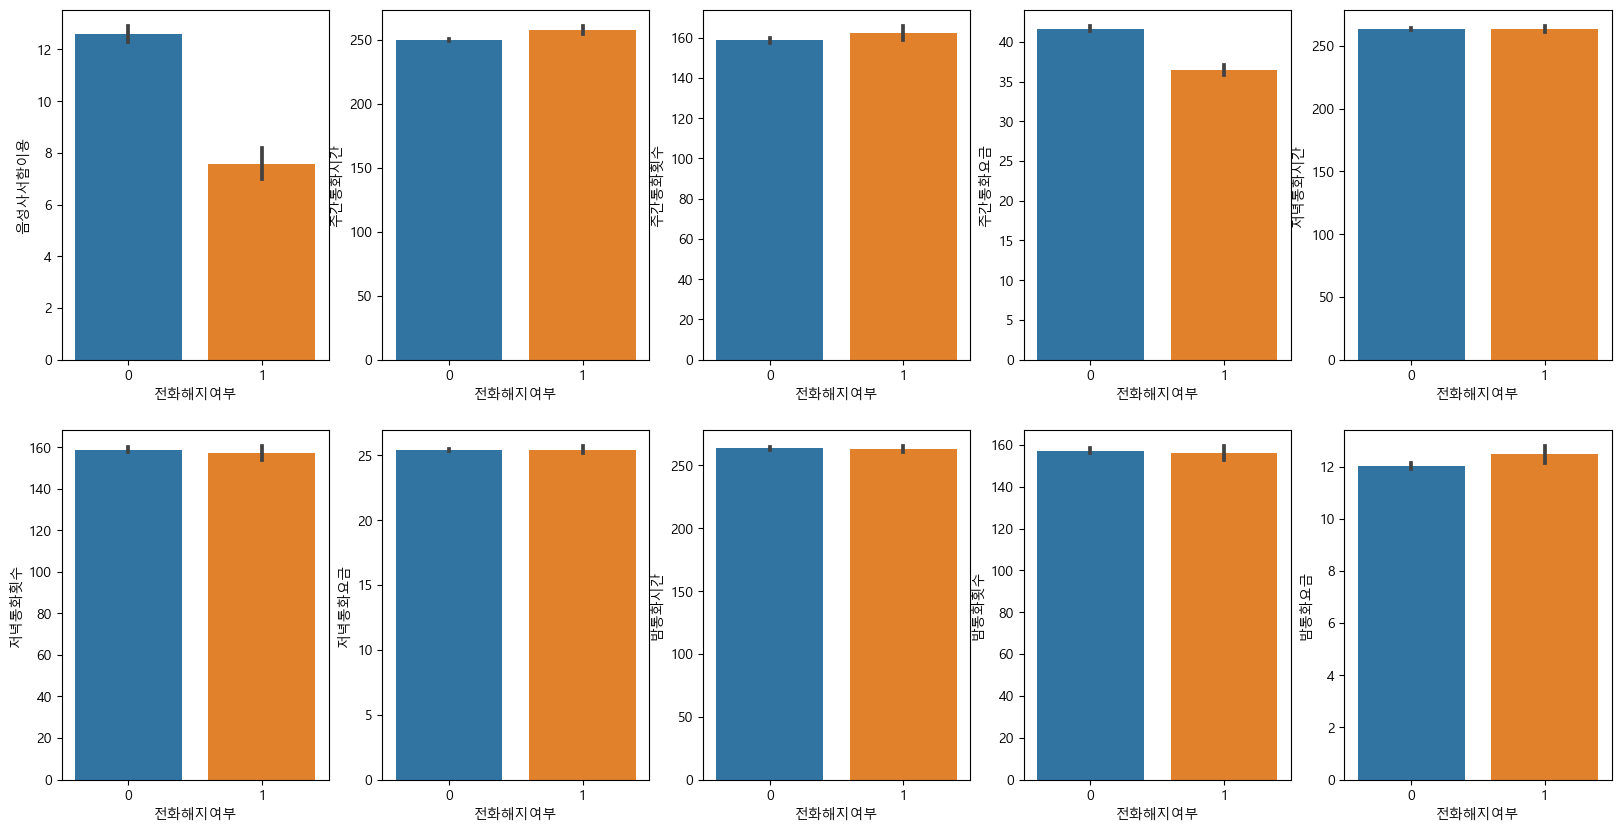

In [8]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.barplot(x=train['전화해지여부'], y=train['음성사서함이용'], ax=ax[0][0])
sns.barplot(x=train['전화해지여부'], y=train['주간통화시간'], ax=ax[0][1])
sns.barplot(x=train['전화해지여부'], y=train['주간통화횟수'], ax=ax[0][2])
sns.barplot(x=train['전화해지여부'], y=train['주간통화요금'], ax=ax[0][3])
sns.barplot(x=train['전화해지여부'], y=train['저녁통화시간'], ax=ax[0][4])
sns.barplot(x=train['전화해지여부'], y=train['저녁통화횟수'], ax=ax[1][0])
sns.barplot(x=train['전화해지여부'], y=train['저녁통화요금'], ax=ax[1][1])
sns.barplot(x=train['전화해지여부'], y=train['밤통화시간'], ax=ax[1][2])
sns.barplot(x=train['전화해지여부'], y=train['밤통화횟수'], ax=ax[1][3])
sns.barplot(x=train['전화해지여부'], y=train['밤통화요금'], ax=ax[1][4])


In [9]:
train_x = train.copy().drop(['ID', '전화해지여부'], axis=1)
train_y = train['전화해지여부']

In [235]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [236]:
test = pd.read_csv('./data/test.csv')
test = test.drop('ID', axis=1)

In [237]:
model =  RandomForestClassifier(random_state=37).fit(train_x, train_y)

In [238]:
pred = model.predict(test)

In [239]:
submit = pd.read_csv('./data/sample_submission.csv')

In [240]:
submit['전화해지여부'] = pred
submit.head()

,ID,전화해지여부
0,TEST_00000,1
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,1
4,TEST_00004,1


In [241]:
submit.to_csv('./result/EDA_re(7).csv', index=False)